#  SINGLE SERVER QUEUE - RAMDON NUMBERS

Se desea simular el comportamiento de un establecimiento comercial como una cola con servidor
único (Single-server Queue). 
El establecimiento ofrece servicio continuo entre las 8 am y las 4 pm (8
horas) y la disciplina de la cola es FIFO. Adicionalmente, se sabe que los tiempos entre llegadas
(minutos)siguen una distribución exponencial con λ=5/10 y los tiempos de servicio (minutos) siguen
una distribución exponencial con λ=6/10.
Realice una simulación con 1000 réplicas y en cada réplica calcule lo siguiente:
- Número de trabajos.
- Estadísticos de trabajo.
- Estadísticos de tiempo.

Una vez realizadas las réplicas, calcule los intervalos de confianza de 95% para:
- Número de trabajos.
- Estadísticos de trabajo.
- Estadísticos de tiempo

In [1]:
import random
import numpy as np
import math
import pandas as pd 
import re
import scipy.stats as st 

In [2]:
########### FUNCIONES ######### 

#Funcion Distribucion exponencial 
def exponencial(lamda):
  return -math.log(1.0 - random.random()) / lamda

#Funcion Buscador de numero menor en lista
def sumar(lista, menor):

    suma = 0.0
    for i in range(1000):
      if(menor >= menor):
        menor = lista[i]

      suma = suma + lista[i]
      tupla = [suma,menor]

    return tupla

from numpy import mean
#######Job-averaged statistics
def averageInterarrival(a):
    r = mean(a)
    aR = 1/r
    return r, aR

def averageService(s):
    s = mean(s)
    sR = 1/s
    return s, sR
def averageDelay(delay):
    d = mean(delay)
    return d

def averageWait(d, s):
    w = mean(d) + mean(s)
    return w

#######Time-averaged statistics


def little_jobsInServiceNode(d, s):
    w = 0.0
    for i, j in zip(d, s):
        w+=(i+j)
    return w


def little_jobsInQueue(d):
    sumD = 0.0
    for i in d:
        sumD+=i
    return sumD


def little_jobsInService(s):
    sumS = 0.0
    for i in s:
        sumS+=i
    return sumS

def delayTime(a, s):
    c = [0.0]*1000
    i = 0
    d = [0.0]*1000
    while i < 999:
        i+=1
        if a[i] < c[i-1]:
            d[i] = c[i-1] - a[i]
        else:
            d[i] = 0
        c[i] = a[i] + d[i] + s[i]
    return d



## Generacion de numero de llegadas para lambda: 5/10 

In [3]:
# Generacion de Numero de Llegadas


#Genero 1000 replicas  (Numero de llegadas)
lista = [] 
for i in range(1000):
    numero = exponencial(5/10)
    lista.append(numero)


#### Condicion que se cumplan las 8 horas ######

suma = 10000
menor = 10000
while suma >= 480:
    suma = 0

    for i in range(1000):

      # Funcion sumar que nos suma y nos encuentra el menor
        tupla = sumar(lista, menor)
        suma = tupla[0]
        menor = tupla[1]

        if( suma >= 480 ):

          ''' 
          Si el numero 
          que estamos comparando 
          es menor o igual al numero menor 
          y es mayor a lo que estamos restando 
          '''

          if ( lista[i] >= menor and lista[i] > 0.5 ):
            lista[i] = lista[i] - 0.5
        else:
          break


numero = 480 - suma
lista[0] = lista[0] + numero

tupla = sumar(lista, menor)
suma = tupla[0]

#print("lista trabajo", lista )
#print( "Las horas de trabajo: ",suma )




## Generacion de tiempo entre servicios para lambda: 6/10

In [4]:
#########''' Generar Tiempo entre Servicios''' ##################################


#Genero 1000 replicas  (Numero de Servicios)
lista2 = [] 
for i in range(1000):
    numero = exponencial(6/10)
    lista2.append(numero)



In [5]:
#### Condicion que se cumplan las 8 horas ######

suma2 = 10000
menor2 = 10000
while suma2 >= 480:
    suma2 = 0

    for i in range(1000):

      # Funcion sumar que nos suma y nos encuentra el menor
        tupla2 = sumar(lista2, menor2)
        suma2 = tupla2[0]
        menor2 = tupla2[1]

        if( suma2 >= 480 ):

          ''' 
          Si el numero 
          que estamos comparando 
          es menor o igual al numero menor 
          y es mayor a lo que estamos restando 
          '''

          if ( lista2[i] >= menor2 and lista2[i] > 0.5 ):
            lista2[i] = lista[i] - 0.5
        else:
          break


numero2 = 480 - suma2
lista2[0] = lista2[0] + numero2

tupla2 = sumar(lista2, menor2)
suma2 = tupla2[0]

#print("lista servicio", lista2 )
#print( "Las horas de Servicio: ",suma2)

## Single Server Queue

In [6]:
######## ''' SERVIDOR COLA UNICA''' #######
d = delayTime(lista, lista2)
averageInterarrival, arrivalRate = averageInterarrival(lista)
averageService, serviceRate = averageService(lista2)
averageDelay = averageDelay(d)
averageWait = averageWait(d, lista2)
jobsInServiceNode = little_jobsInServiceNode(d, lista2)
jobsInQueue = little_jobsInQueue(d)
jobsInService = little_jobsInService(lista2)
print("##########################################")
print("##########################################")
print("############ Statistics ##################")
print("##########################################")
print("##########################################")


print("\nAverage interarrival time: {} | Arrival rate: {}".format(averageInterarrival, arrivalRate))
print("\nAverage service time: {} | Service rate: {}".format(averageService, serviceRate))
print("\nAverage delay: ", averageDelay)
print("\nAverage wait: ", averageWait)


print("Time used in service node: ", jobsInServiceNode)
print("Time used in queue: ", jobsInQueue)
print("Time used in service: ", jobsInService)


##########################################
##########################################
############ Statistics ##################
##########################################
##########################################

Average interarrival time: 0.48000000000000054 | Arrival rate: 2.083333333333331

Average service time: 0.4800000000000002 | Service rate: 2.0833333333333326

Average delay:  153.5206402030027

Average wait:  154.0006402030027
Time used in service node:  154000.64020300267
Time used in queue:  153520.64020300264
Time used in service:  480.00000000000006


# Intervalos de confianza

Calcular el intervalo de confianza del 95% de la media de la matriz

In [7]:
import scipy.stats 
def intervalos_confianza(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h



# Intervalos de confianza para Trabajos

In [8]:
import matplotlib.pyplot as plt

plt.plot(lista)



In [9]:
print("\n Intervalos confianza de 95% para trabajos",intervalos_confianza(lista))



 Intervalos confianza de 95% para trabajos (0.48000000000000054, 0.4214631743982653, 0.5385368256017358)


# Intervalos de Confianza Servicios

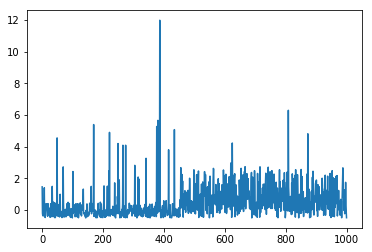

In [10]:
plt.plot(lista2)

In [11]:
print("\n Intervalos confianza de 95% para servicios",intervalos_confianza(lista2))



 Intervalos confianza de 95% para servicios (0.4800000000000002, 0.4171262842590685, 0.5428737157409319)
